# Visualisierung der Gemeinde-Cluster im politischen Raum

Darstellung der 4 Cluster im 3-dimensionalen PCA-Raum.

**Dimensionen:**
- PC1: Rechts ↔ Links (wirtschaftlich)
- PC2: Konservativ ↔ Liberal (gesellschaftlich)
- PC3: Technokratisch ↔ Ökologisch

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

# Daten laden
df = pd.read_csv('municipality_clusters_pca.csv')
print(f"Geladen: {len(df)} Gemeinden mit {df['final_cluster'].nunique()} Clustern")
print(f"\nCluster-Verteilung:")
print(df['final_cluster'].value_counts().sort_index())

Geladen: 2109 Gemeinden mit 4 Clustern

Cluster-Verteilung:
final_cluster
0    683
1    330
2    719
3    377
Name: count, dtype: int64


In [2]:
# Cluster-Namen und Farben definieren
# Basierend auf den Cluster-Zentroiden:
# Cluster 0: PC1=-9.4 (Rechts), PC2=-1.2 (leicht Konservativ)
# Cluster 1: PC1=+6.7 (Links), PC2=-7.9 (Konservativ) 
# Cluster 2: PC1=-0.4 (Mitte), PC2=+4.2 (Liberal)
# Cluster 3: PC1=+12.0 (Links), PC2=+1.1 (Liberal)

cluster_names = {
    0: 'Rechts-Konservativ',
    1: 'Links-Konservativ',
    2: 'Mitte-Liberal',
    3: 'Links-Liberal'
}

# Farben für die Cluster
cluster_colors = {
    0: '#e41a1c',  # Rot - Rechts-Konservativ
    1: '#377eb8',  # Blau - Links-Konservativ
    2: '#4daf4a',  # Grün - Mitte-Liberal
    3: '#984ea3'   # Violett - Links-Liberal
}

df['cluster_name'] = df['final_cluster'].map(cluster_names)
df['color'] = df['final_cluster'].map(cluster_colors)

# Wichtige Gemeinden zum Beschriften (grosse Städte + typische Vertreter)
wichtige_gemeinden = [
    'Zürich', 'Genève', 'Basel', 'Bern', 'Lausanne', 'Winterthur', 
    'Luzern', 'St. Gallen', 'Lugano', 'Zug', 'Fribourg', 'Neuchâtel',
    'Chur', 'Schaffhausen', 'Sion', 'Bellinzona',
    # Rechte/Konservative Gemeinden
    'Muotathal', 'Schwyz', 'Appenzell', 'Einsiedeln', 'Unteriberg',
    # Weitere interessante
    'Zermatt', 'Davos', 'Aarau', 'Solothurn'
]

# Gemeinden fuer Beschriftung extrahieren
label_df = df[df['municipality_name'].isin(wichtige_gemeinden)].copy()
print(f"Gemeinden für Beschriftung: {len(label_df)}")

print("\nCluster-Profile (neue Achsen: PC1=Rechts-Links, PC2=Konservativ-Liberal):")
for c, name in cluster_names.items():
    subset = df[df['final_cluster'] == c]
    print(f"  Cluster {c} ({name}): {len(subset)} Gemeinden")
    print(f"    PC1={subset['PC1'].mean():+.1f} (Rechts-/Links+), PC2={subset['PC2'].mean():+.1f} (Kons-/Lib+), PC3={subset['PC3'].mean():+.1f}")

Gemeinden für Beschriftung: 25

Cluster-Profile (neue Achsen: PC1=Rechts-Links, PC2=Konservativ-Liberal):
  Cluster 0 (Rechts-Konservativ): 683 Gemeinden
    PC1=-9.4 (Rechts-/Links+), PC2=-1.2 (Kons-/Lib+), PC3=-0.9
  Cluster 1 (Links-Konservativ): 330 Gemeinden
    PC1=+6.7 (Rechts-/Links+), PC2=-7.9 (Kons-/Lib+), PC3=+0.6
  Cluster 2 (Mitte-Liberal): 719 Gemeinden
    PC1=-0.4 (Rechts-/Links+), PC2=+4.2 (Kons-/Lib+), PC3=+3.1
  Cluster 3 (Links-Liberal): 377 Gemeinden
    PC1=+12.0 (Rechts-/Links+), PC2=+1.1 (Kons-/Lib+), PC3=-4.7


## 1. PC1 vs PC2: Rechts-Links vs Konservativ-Liberal

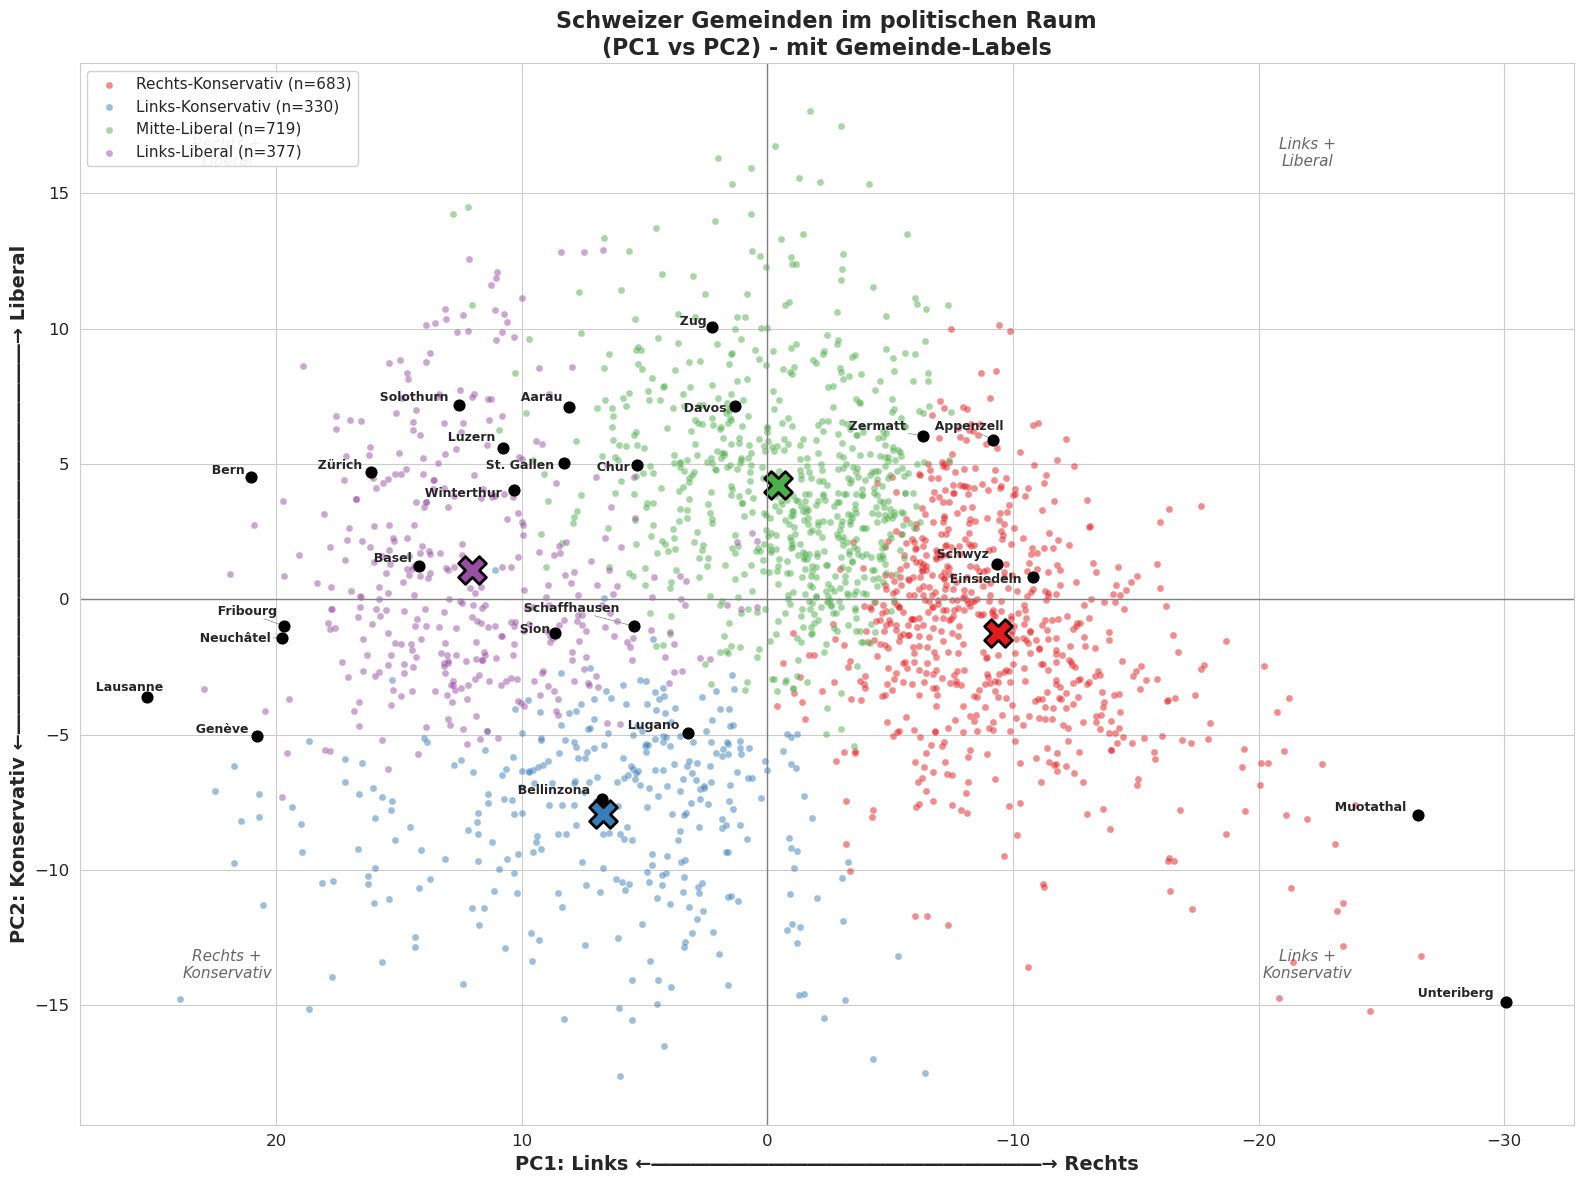

In [3]:
from adjustText import adjust_text

fig, ax = plt.subplots(figsize=(16, 12))

# Cluster plotten
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC1'], subset['PC2'],
        c=cluster_colors[cluster],
        label=f'{cluster_names[cluster]} (n={len(subset)})',
        alpha=0.5, s=25, edgecolors='white', linewidths=0.2
    )

# Cluster-Zentren
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC1'].mean(), subset['PC2'].mean(),
        c=cluster_colors[cluster], marker='X', s=400,
        edgecolors='black', linewidths=2
    )

# Wichtige Gemeinden beschriften
texts = []
for _, row in label_df.iterrows():
    ax.scatter(row['PC1'], row['PC2'], c='black', s=60, zorder=5, marker='o')
    texts.append(ax.text(row['PC1'], row['PC2'], f"  {row['municipality_name']}", 
                         fontsize=9, fontweight='bold', zorder=6))

# Labels anpassen um Überlappung zu vermeiden
try:
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
except:
    pass

# X-Achse invertieren: Links (positiv) links, Rechts (negativ) rechts
ax.invert_xaxis()

# Achsen
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1)
ax.axvline(x=0, color='gray', linestyle='-', linewidth=1)

# Beschriftung der Quadranten (angepasst für invertierte Achse)
ax.text(-22, 16, 'Links +\nLiberal', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(22, 16, 'Rechts +\nLiberal', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(-22, -14, 'Links +\nKonservativ', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(22, -14, 'Rechts +\nKonservativ', fontsize=11, ha='center', style='italic', alpha=0.7)

ax.set_xlabel('PC1: Links ←――――――――――――――――――――→ Rechts', fontsize=14, fontweight='bold')
ax.set_ylabel('PC2: Konservativ ←――――――――――――――――――――→ Liberal', fontsize=14, fontweight='bold')
ax.set_title('Schweizer Gemeinden im politischen Raum\n(PC1 vs PC2) - mit Gemeinde-Labels', fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)

plt.tight_layout()
plt.savefig('cluster_pc1_pc2.png', dpi=200, bbox_inches='tight')
plt.show()

## 2. PC1 vs PC3: Rechts-Links vs Technokratisch-Ökologisch

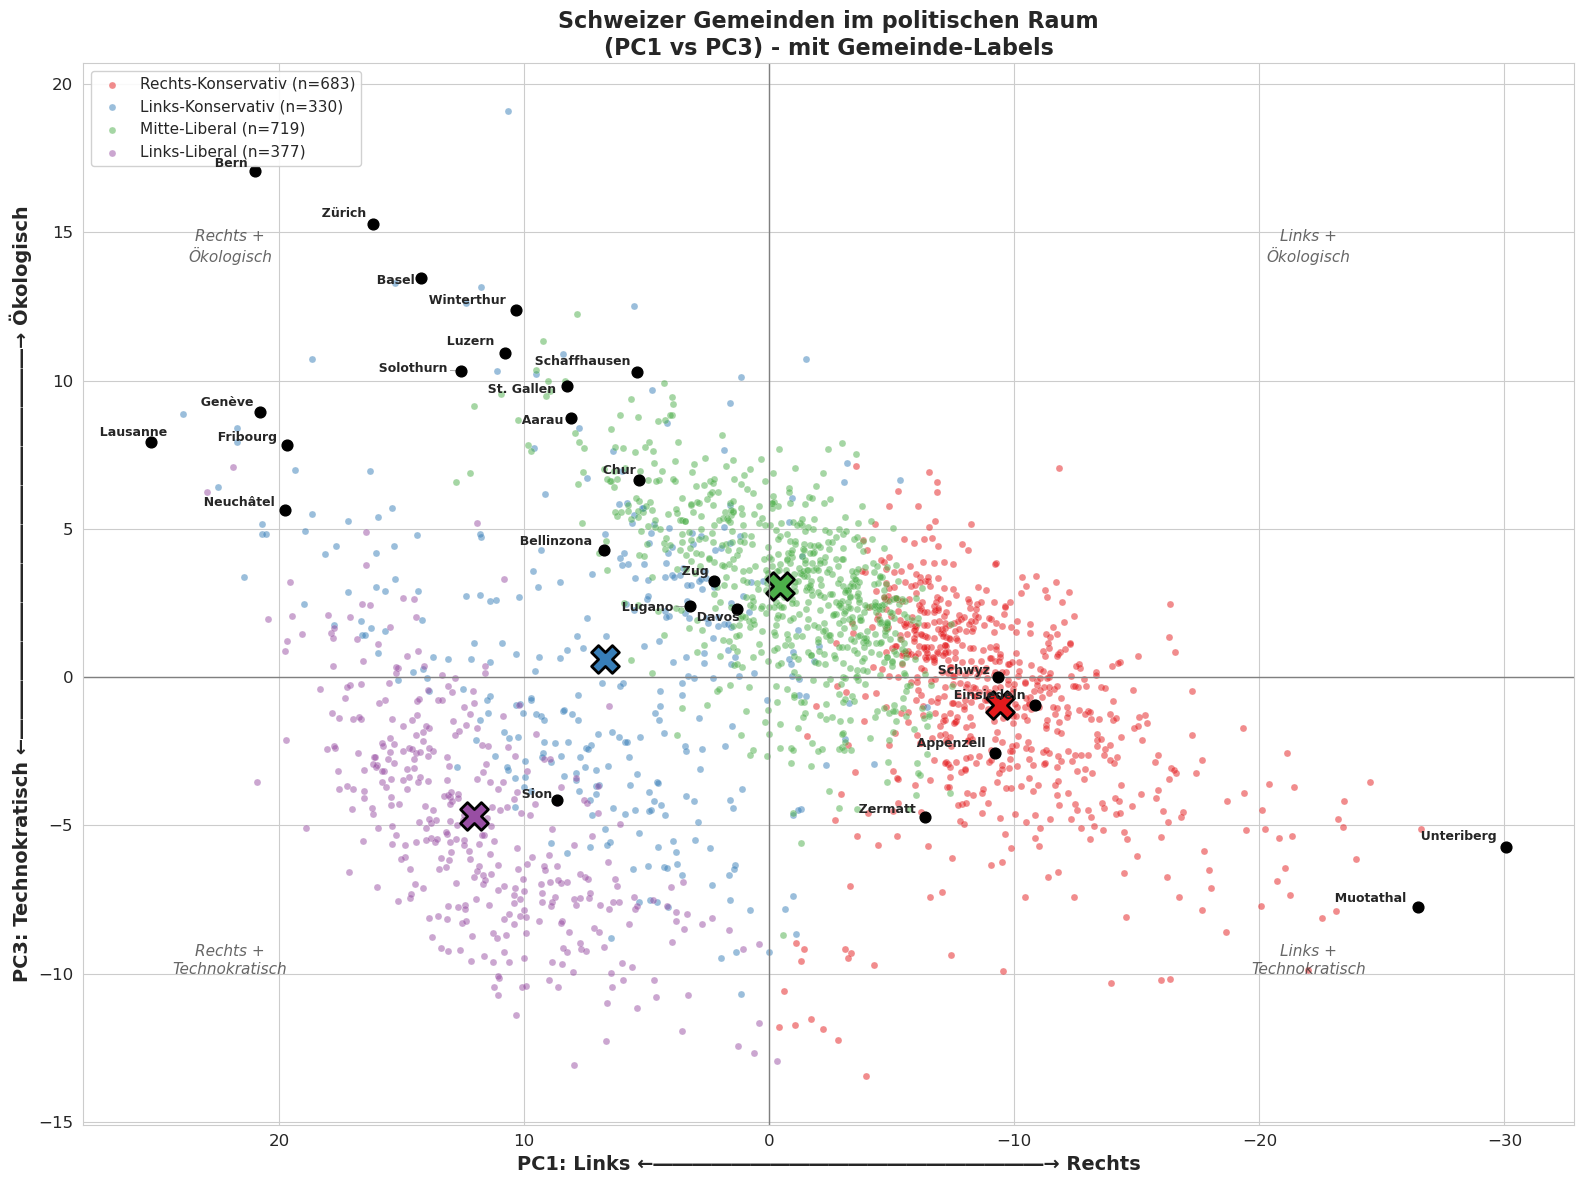

In [4]:
fig, ax = plt.subplots(figsize=(16, 12))

# Cluster plotten
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC1'], subset['PC3'],
        c=cluster_colors[cluster],
        label=f'{cluster_names[cluster]} (n={len(subset)})',
        alpha=0.5, s=25, edgecolors='white', linewidths=0.2
    )

# Cluster-Zentren
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC1'].mean(), subset['PC3'].mean(),
        c=cluster_colors[cluster], marker='X', s=400,
        edgecolors='black', linewidths=2
    )

# Wichtige Gemeinden beschriften
texts = []
for _, row in label_df.iterrows():
    ax.scatter(row['PC1'], row['PC3'], c='black', s=60, zorder=5, marker='o')
    texts.append(ax.text(row['PC1'], row['PC3'], f"  {row['municipality_name']}", 
                         fontsize=9, fontweight='bold', zorder=6))

try:
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
except:
    pass

# X-Achse invertieren: Links (positiv) links, Rechts (negativ) rechts
ax.invert_xaxis()

# Achsen
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1)
ax.axvline(x=0, color='gray', linestyle='-', linewidth=1)

# Beschriftung der Quadranten (angepasst für invertierte Achse)
ax.text(-22, 14, 'Links +\nÖkologisch', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(22, 14, 'Rechts +\nÖkologisch', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(-22, -10, 'Links +\nTechnokratisch', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(22, -10, 'Rechts +\nTechnokratisch', fontsize=11, ha='center', style='italic', alpha=0.7)

ax.set_xlabel('PC1: Links ←――――――――――――――――――――→ Rechts', fontsize=14, fontweight='bold')
ax.set_ylabel('PC3: Technokratisch ←――――――――――――――――――――→ Ökologisch', fontsize=14, fontweight='bold')
ax.set_title('Schweizer Gemeinden im politischen Raum\n(PC1 vs PC3) - mit Gemeinde-Labels', fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)

plt.tight_layout()
plt.savefig('cluster_pc1_pc3.png', dpi=200, bbox_inches='tight')
plt.show()

## 3. PC2 vs PC3: Konservativ-Liberal vs Technokratisch-Ökologisch

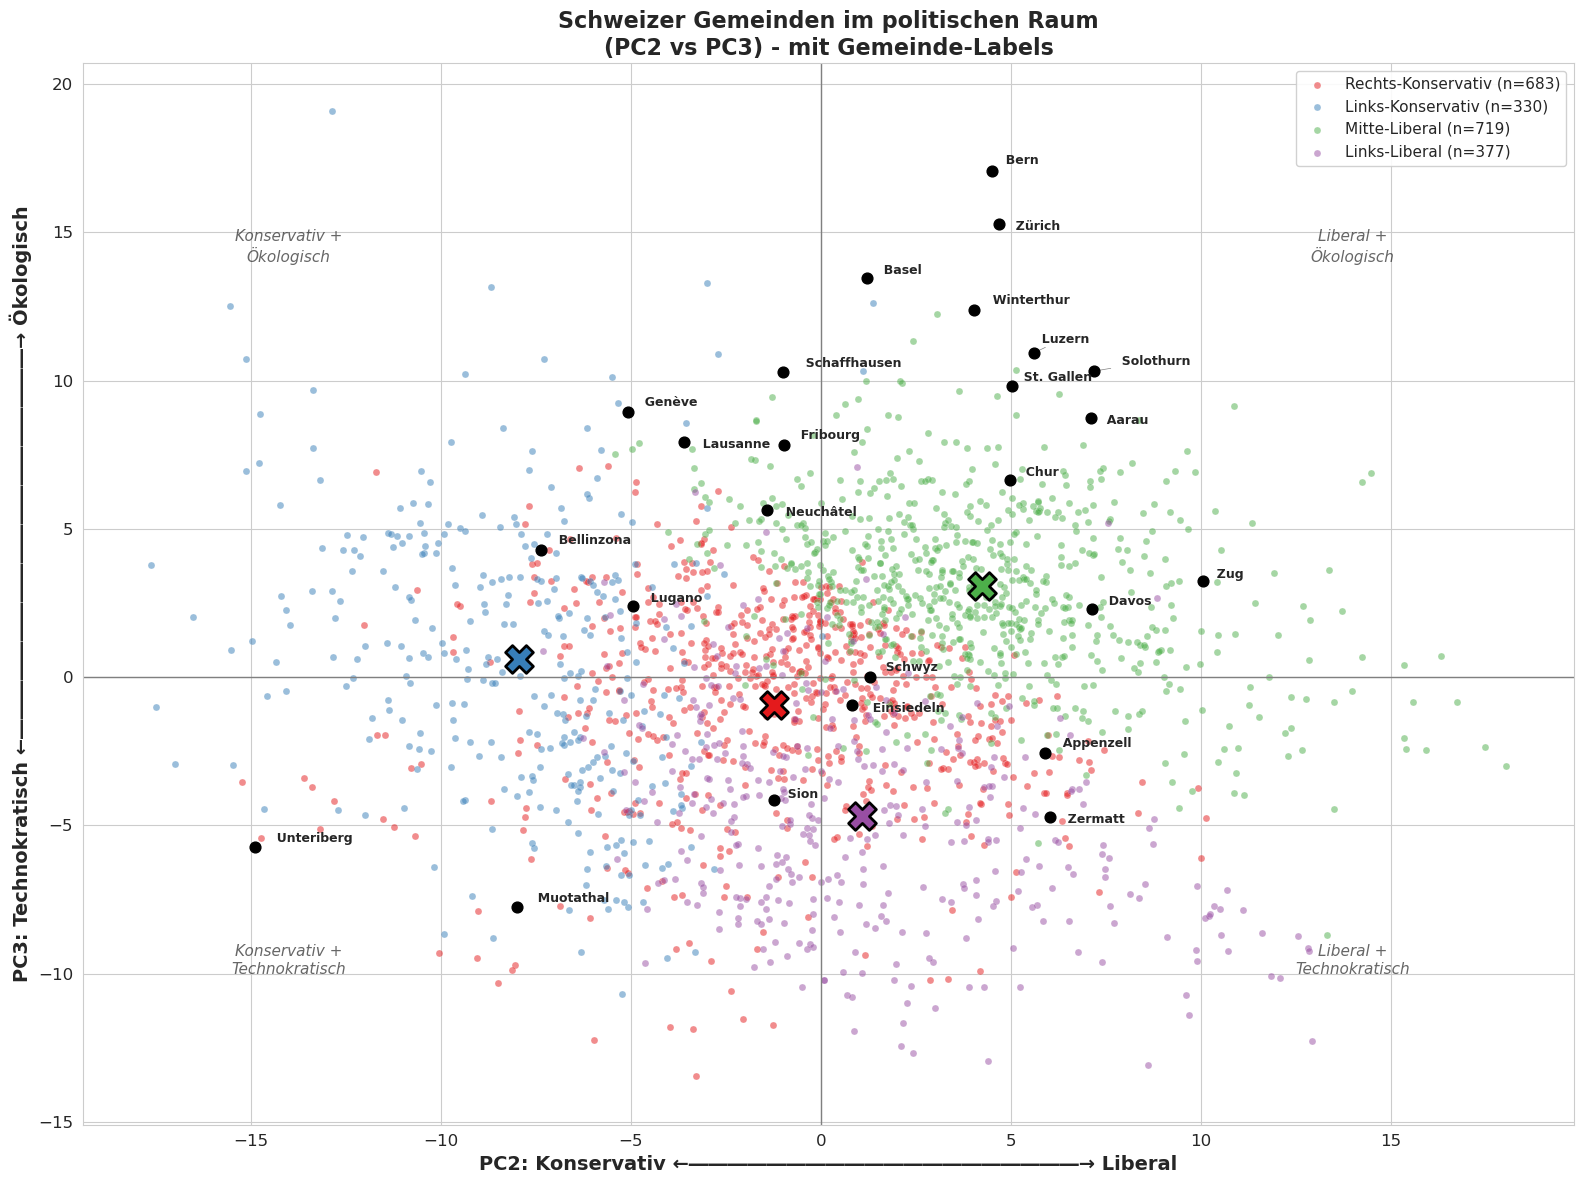

In [5]:
fig, ax = plt.subplots(figsize=(16, 12))

# Cluster plotten
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC2'], subset['PC3'],
        c=cluster_colors[cluster],
        label=f'{cluster_names[cluster]} (n={len(subset)})',
        alpha=0.5, s=25, edgecolors='white', linewidths=0.2
    )

# Cluster-Zentren
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC2'].mean(), subset['PC3'].mean(),
        c=cluster_colors[cluster], marker='X', s=400,
        edgecolors='black', linewidths=2
    )

# Wichtige Gemeinden beschriften
texts = []
for _, row in label_df.iterrows():
    ax.scatter(row['PC2'], row['PC3'], c='black', s=60, zorder=5, marker='o')
    texts.append(ax.text(row['PC2'], row['PC3'], f"  {row['municipality_name']}", 
                         fontsize=9, fontweight='bold', zorder=6))

try:
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
except:
    pass

# Achsen
ax.axhline(y=0, color='gray', linestyle='-', linewidth=1)
ax.axvline(x=0, color='gray', linestyle='-', linewidth=1)

# Beschriftung der Quadranten
ax.text(14, 14, 'Liberal +\nÖkologisch', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(-14, 14, 'Konservativ +\nÖkologisch', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(14, -10, 'Liberal +\nTechnokratisch', fontsize=11, ha='center', style='italic', alpha=0.7)
ax.text(-14, -10, 'Konservativ +\nTechnokratisch', fontsize=11, ha='center', style='italic', alpha=0.7)

ax.set_xlabel('PC2: Konservativ ←――――――――――――――――――――→ Liberal', fontsize=14, fontweight='bold')
ax.set_ylabel('PC3: Technokratisch ←――――――――――――――――――――→ Ökologisch', fontsize=14, fontweight='bold')
ax.set_title('Schweizer Gemeinden im politischen Raum\n(PC2 vs PC3) - mit Gemeinde-Labels', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=11, framealpha=0.9)

plt.tight_layout()
plt.savefig('cluster_pc2_pc3.png', dpi=200, bbox_inches='tight')
plt.show()

## 4. Übersicht: Alle drei Ansichten

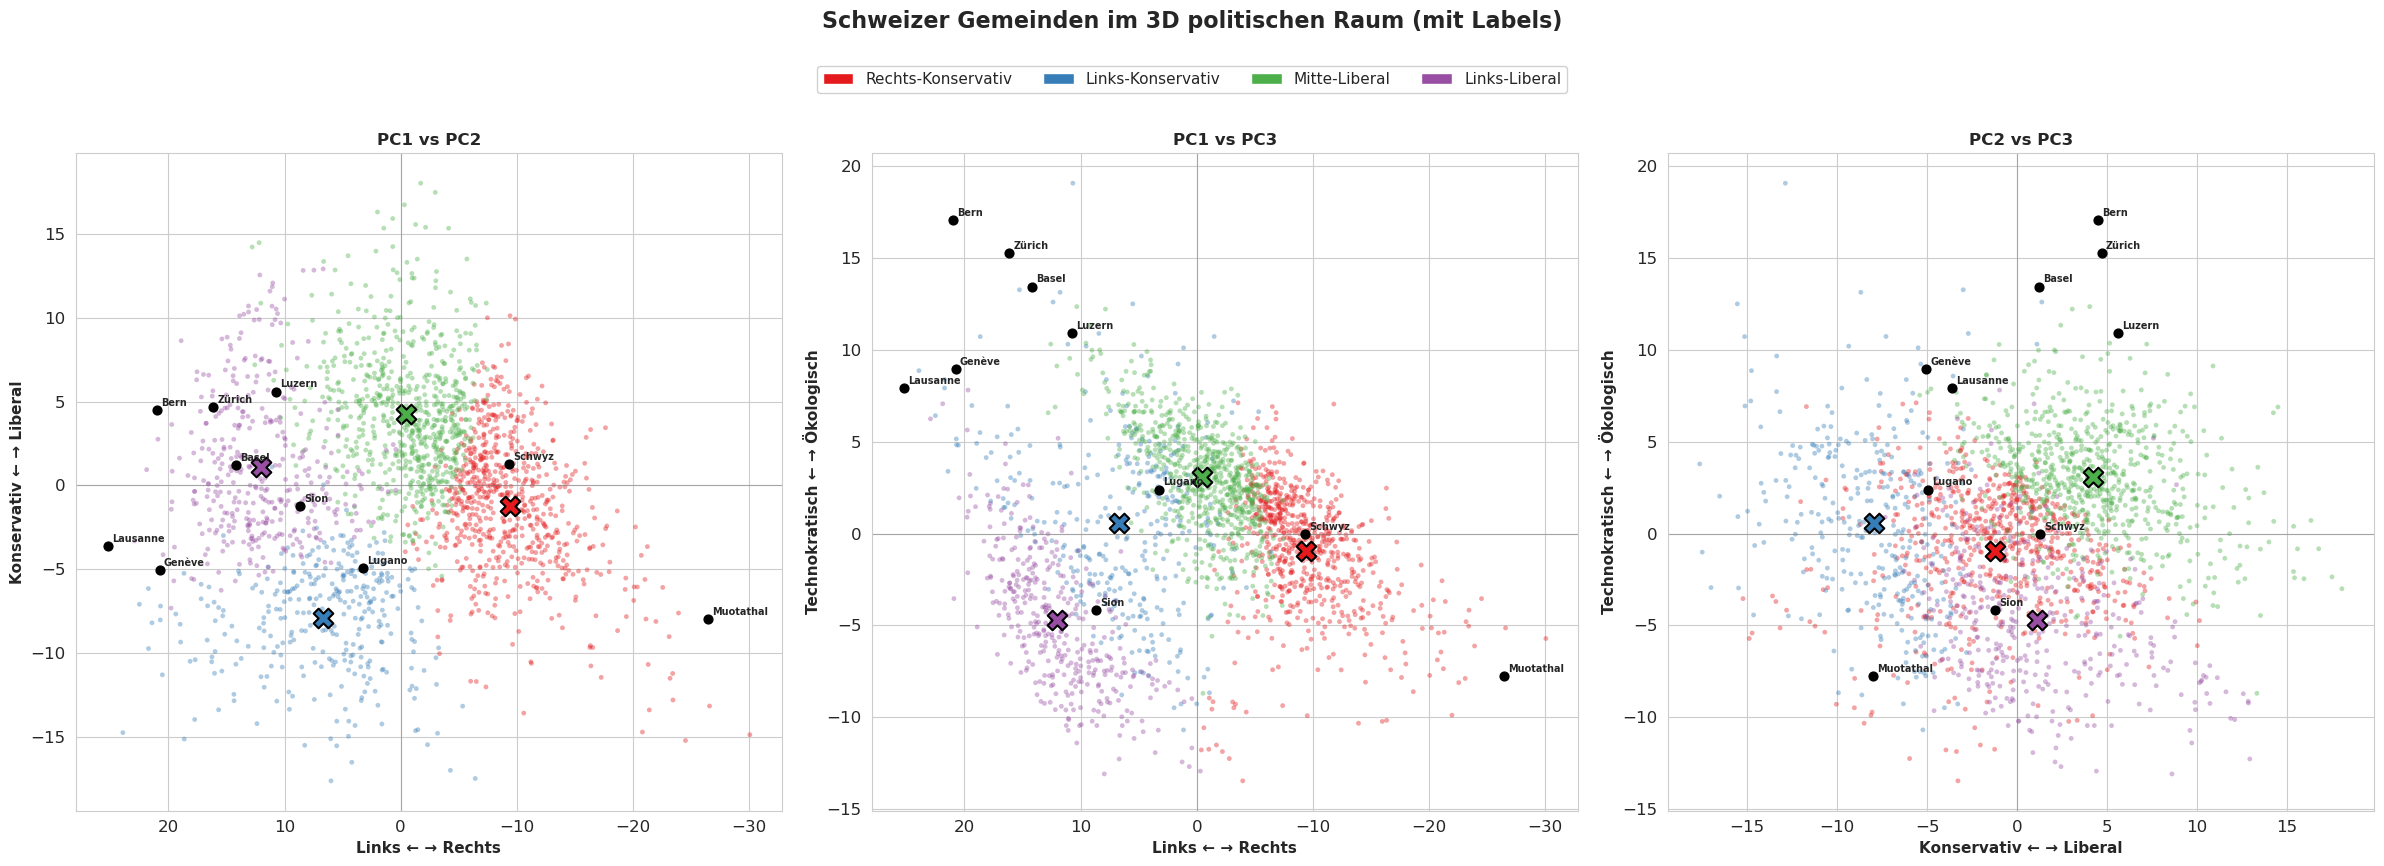

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

plot_configs = [
    ('PC1', 'PC2', 'Links ← → Rechts', 'Konservativ ← → Liberal', True),
    ('PC1', 'PC3', 'Links ← → Rechts', 'Technokratisch ← → Ökologisch', True),
    ('PC2', 'PC3', 'Konservativ ← → Liberal', 'Technokratisch ← → Ökologisch', False)
]

# Auswahl der wichtigsten Städte für Overview
overview_cities = ['Zürich', 'Genève', 'Bern', 'Basel', 'Lausanne', 'Luzern', 
                   'Muotathal', 'Schwyz', 'Lugano', 'Sion']
overview_df = df[df['municipality_name'].isin(overview_cities)]

for ax, (x_col, y_col, x_label, y_label, invert_x) in zip(axes, plot_configs):
    for cluster in sorted(df['final_cluster'].unique()):
        subset = df[df['final_cluster'] == cluster]
        ax.scatter(
            subset[x_col], subset[y_col],
            c=cluster_colors[cluster],
            label=cluster_names[cluster],
            alpha=0.4, s=12, edgecolors='none'
        )
    
    # Zentren
    for cluster in sorted(df['final_cluster'].unique()):
        subset = df[df['final_cluster'] == cluster]
        ax.scatter(
            subset[x_col].mean(), subset[y_col].mean(),
            c=cluster_colors[cluster], marker='X', s=200,
            edgecolors='black', linewidths=1.5
        )
    
    # Gemeinden beschriften
    for _, row in overview_df.iterrows():
        ax.scatter(row[x_col], row[y_col], c='black', s=40, zorder=5)
        ax.annotate(row['municipality_name'], (row[x_col], row[y_col]),
                   fontsize=7, fontweight='bold', xytext=(3, 3), 
                   textcoords='offset points')
    
    # X-Achse invertieren wenn PC1
    if invert_x:
        ax.invert_xaxis()
    
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)
    ax.set_xlabel(x_label, fontsize=11, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=11, fontweight='bold')
    ax.set_title(f'{x_col} vs {y_col}', fontsize=12, fontweight='bold')

# Gemeinsame Legende
handles = [Patch(facecolor=cluster_colors[c], label=cluster_names[c]) for c in sorted(cluster_names.keys())]
fig.legend(handles=handles, loc='upper center', ncol=4, fontsize=11, 
           bbox_to_anchor=(0.5, 1.02), framealpha=0.9)

plt.suptitle('Schweizer Gemeinden im 3D politischen Raum (mit Labels)', fontsize=16, fontweight='bold', y=1.08)
plt.tight_layout()
plt.savefig('cluster_overview.png', dpi=200, bbox_inches='tight')
plt.show()

## 5. 3D-Visualisierung

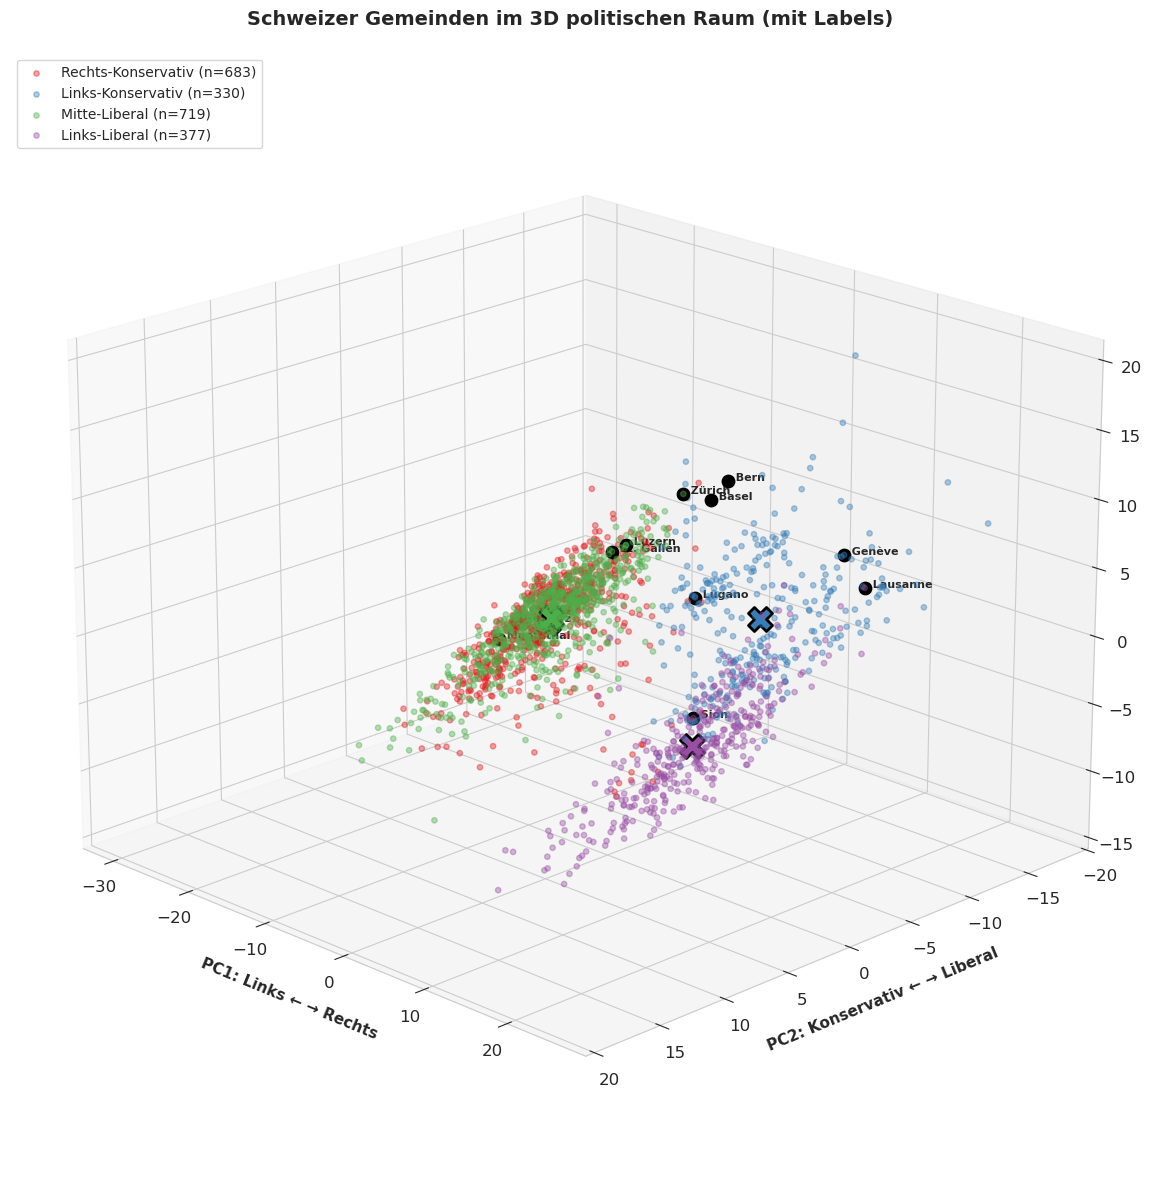

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Cluster plotten
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        c=cluster_colors[cluster],
        label=f'{cluster_names[cluster]} (n={len(subset)})',
        alpha=0.4, s=15
    )

# Cluster-Zentren
for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    ax.scatter(
        subset['PC1'].mean(), subset['PC2'].mean(), subset['PC3'].mean(),
        c=cluster_colors[cluster], marker='X', s=300,
        edgecolors='black', linewidths=2
    )

# Wichtige Gemeinden beschriften (3D)
cities_3d = ['Zürich', 'Genève', 'Bern', 'Basel', 'Lausanne', 'Luzern', 
             'Muotathal', 'Schwyz', 'Lugano', 'Sion', 'St. Gallen']
cities_3d_df = df[df['municipality_name'].isin(cities_3d)]

for _, row in cities_3d_df.iterrows():
    ax.scatter(row['PC1'], row['PC2'], row['PC3'], c='black', s=80, zorder=5)
    ax.text(row['PC1'], row['PC2'], row['PC3'], f"  {row['municipality_name']}", 
            fontsize=8, fontweight='bold')

# X-Achse (PC1) invertieren: Links (positiv) links, Rechts (negativ) rechts
ax.invert_xaxis()

ax.set_xlabel('\nPC1: Links ← → Rechts', fontsize=11, fontweight='bold')
ax.set_ylabel('\nPC2: Konservativ ← → Liberal', fontsize=11, fontweight='bold')
ax.set_zlabel('\nPC3: Techn. ← → Ökol.', fontsize=11, fontweight='bold')
ax.set_title('Schweizer Gemeinden im 3D politischen Raum (mit Labels)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10)

# Besserer Blickwinkel
ax.view_init(elev=20, azim=135)  # Angepasst für invertierte X-Achse

plt.tight_layout()
plt.savefig('cluster_3d.png', dpi=200, bbox_inches='tight')
plt.show()

## 6. Cluster-Zusammenfassung

In [8]:
print("="*80)
print("ZUSAMMENFASSUNG DER CLUSTER")
print("="*80)
print("\nAchsen-Interpretation:")
print("  PC1: Rechts (-) ↔ Links (+)")
print("  PC2: Konservativ (-) ↔ Liberal (+)")
print("  PC3: Technokratisch (-) ↔ Ökologisch (+)")

for cluster in sorted(df['final_cluster'].unique()):
    subset = df[df['final_cluster'] == cluster]
    
    print(f"\n{'─'*80}")
    print(f"CLUSTER {cluster}: {cluster_names[cluster].upper()}")
    print(f"{'─'*80}")
    print(f"Anzahl Gemeinden: {len(subset)} ({len(subset)/len(df)*100:.1f}%)")
    print(f"\nMittlere Koordinaten:")
    print(f"  PC1 (Rechts-Links):           {subset['PC1'].mean():+7.1f}")
    print(f"  PC2 (Konservativ-Liberal):    {subset['PC2'].mean():+7.1f}")
    print(f"  PC3 (Technokr.-Ökologisch):   {subset['PC3'].mean():+7.1f}")
    
    # Typische Gemeinden
    center = subset[['PC1', 'PC2', 'PC3']].mean()
    subset = subset.copy()
    subset['dist'] = np.sqrt(
        (subset['PC1'] - center['PC1'])**2 + 
        (subset['PC2'] - center['PC2'])**2 +
        (subset['PC3'] - center['PC3'])**2
    )
    
    print(f"\nTypische Gemeinden (nahe am Zentrum):")
    for _, row in subset.nsmallest(8, 'dist').iterrows():
        print(f"  • {row['municipality_name']}")

ZUSAMMENFASSUNG DER CLUSTER

Achsen-Interpretation:
  PC1: Rechts (-) ↔ Links (+)
  PC2: Konservativ (-) ↔ Liberal (+)
  PC3: Technokratisch (-) ↔ Ökologisch (+)

────────────────────────────────────────────────────────────────────────────────
CLUSTER 0: RECHTS-KONSERVATIV
────────────────────────────────────────────────────────────────────────────────
Anzahl Gemeinden: 683 (32.4%)

Mittlere Koordinaten:
  PC1 (Rechts-Links):              -9.4
  PC2 (Konservativ-Liberal):       -1.2
  PC3 (Technokr.-Ökologisch):      -0.9

Typische Gemeinden (nahe am Zentrum):
  • Laupersdorf
  • Oberegg
  • Seelisberg
  • Merishausen
  • Schattdorf
  • Arni (BE)
  • Pfäfers
  • Bürglen (UR)

────────────────────────────────────────────────────────────────────────────────
CLUSTER 1: LINKS-KONSERVATIV
────────────────────────────────────────────────────────────────────────────────
Anzahl Gemeinden: 330 (15.6%)

Mittlere Koordinaten:
  PC1 (Rechts-Links):              +6.7
  PC2 (Konservativ-Liberal):   

In [9]:
print("\nVisualisierungen gespeichert:")
print("  • cluster_pc1_pc2.png")
print("  • cluster_pc1_pc3.png")
print("  • cluster_pc2_pc3.png")
print("  • cluster_overview.png")
print("  • cluster_3d.png")


Visualisierungen gespeichert:
  • cluster_pc1_pc2.png
  • cluster_pc1_pc3.png
  • cluster_pc2_pc3.png
  • cluster_overview.png
  • cluster_3d.png
